In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [2]:
# read data
#df = pd.read_csv("solar-panels.csv")
df = pd.read_csv("solar-panels-all.csv")
del df["Unnamed: 0"]

In [3]:
#read/edit weather data
df_weather = pd.read_csv("weather-data-hourly.csv")
df_weather["Time Stamp Hour"] = df_weather["date_time"].apply(lambda x : x.split(":")[0])
zip_dict = {32922: "Cocoa", 97401: "Eugene", 80401: "Golden"}
df_weather["Site"] = df_weather["location"].apply(lambda x : zip_dict[x])
del df_weather["location"]; del df_weather["Unnamed: 0"]

In [4]:
#create master df
df_master = df.merge(df_weather, how="left",left_on=["Time Stamp Hour", "Site"], right_on=["Time Stamp Hour", "Site"])
df_master.columns

Index(['Time Stamp Hour',
       'Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss',
       'POA irradiance CMP22 pyranometer (W/m2)',
       'POA irradiance uncertainty (%)',
       'PV module back surface temperature (degC)',
       'PV module back surface temperature uncertainty (degC)', 'Isc (A)',
       'Isc uncertainty (%)', 'Pmp (W)', 'Pmp uncertainty (%)', 'Imp (A)',
       'Imp uncertainty (%)', 'Vmp (V)', 'Vmp uncertainty (%)', 'Voc (V)',
       'Voc uncertainty (%)', 'FF (%FF)', 'FF uncertainty (%)',
       'Change in CMP22 during I-V scan +/- W/m2',
       'Change in Li-COR during I-V scan +/- W/m2',
       'MT5 cabinet temperature (degC)', 'Dry bulb temperature (degC)',
       'Dry bulb temperature uncertainty (degC)', 'Relative humidity (%RH)',
       'Relative humidity uncertainty (%RH)', 'Atmospheric pressure (mb)',
       'Atmospheric pressure uncertainty (%)',
       'Precipitation (mm) accumulated daily total',
       'Direct normal irradiance (W/m2)',
       'Di

In [5]:
#filter data
df2 = df_master[df_master["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] <= 1000]

In [6]:
df_cleaned = df3[df3["Cleaned"] == 1]
df_dirty = df3[df3["Cleaned"] == 0]

In [7]:
def time_identifier(row):
    if row["Day"] <= 10:
        return 1
    elif (row["Day"] > 10) and (row["Day"]) <= 20:
        return 2
    else:
        return 3

In [32]:
df_dirty["Year"] = df_dirty["Time Stamp Hour"].apply(lambda x : int(x.split("-")[0]))
df_dirty["Month"] = df_dirty["Time Stamp Hour"].apply(lambda x : int(x.split("-")[1]))
df_dirty["Day"] = df_dirty["Time Stamp Hour"].apply(lambda x : int(x.split("-")[2][:2]))
df_dirty["Time Identifier"] = df_dirty.apply(time_identifier, axis = 1)
df_group = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).first()

/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Year,Month,Time Identifier,Site,Time Stamp Hour,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Day,Max Wind Speed,Soiling Change
0,2011,1,3,Cocoa,2011-01-21 08,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,...,92,0.4,1011,19,10,283,12,21,32,0.000
1,2011,2,1,Cocoa,2011-02-01 07,2011-02-01T07:25:03,22.6,16.1,12.5,1.9,...,87,0.0,1020,19,10,150,11,1,27,0.000
2,2011,2,2,Cocoa,2011-02-15 07,2011-02-15T07:20:03,31.7,11.9,7.5,1.9,...,81,0.0,1024,12,10,203,14,15,20,0.005
3,2011,2,3,Cocoa,2011-02-21 07,2011-02-21T07:20:03,24.2,15.0,16.5,1.9,...,90,0.0,1019,19,5,207,11,21,20,0.007
4,2011,3,1,Cocoa,2011-03-01 07,2011-03-01T07:15:03,31.7,11.7,19.2,1.9,...,90,0.0,1017,20,10,233,17,1,26,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2013,12,1,Eugene,2013-12-01 08,2013-12-01T08:05:12,25.7,14.2,14.1,1.9,...,97,0.0,1025,9,7,182,13,1,15,0.000
115,2013,12,2,Eugene,2013-12-13 08,2013-12-13T08:35:13,27.4,13.0,6.8,1.9,...,96,0.0,1029,4,2,170,6,13,14,0.000
116,2013,12,3,Eugene,2013-12-21 10,2013-12-21T10:50:12,124.1,3.3,16.0,1.9,...,98,0.0,1022,8,1,209,6,21,11,-0.007
117,2014,1,1,Eugene,2014-01-01 08,2014-01-01T08:20:12,20.0,18.0,2.9,1.9,...,73,0.0,1027,5,10,49,2,1,19,0.000


In [41]:
#create input groups
df_group["Max wind speed"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).max()["windspeedKmph"]
df_group["Max wind direction"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).max()["winddirDegree"]
df_group["Min wind direction"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).min()["winddirDegree"]
df_group["Mean POA irradiance"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).mean()["POA irradiance CMP22 pyranometer (W/m2)"]
df_group["Max POA irradiance"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).max()["POA irradiance CMP22 pyranometer (W/m2)"]
df_group["Mean humidity"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).mean()["humidity"]
df_group["Max humidity"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).max()["humidity"]
df_group["Mean temp"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).mean()["tempC"]
df_group["Max temp"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).max()["tempC"]
df_group["Max precip"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).max()["precipMM"]
df_group["Mean precip"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).mean()["precipMM"]
df_group["Soiling Change"] = df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).last()["PV module soiling derate"] - df_dirty.groupby(["Year", "Month", "Time Identifier", "Site"], as_index=False).first()["PV module soiling derate"]



In [60]:
#filter data
df_delta = df_group[df_group["Soiling Change"] <= 0]
#df_delta

In [38]:
"""
print(len(df_delta[df_delta["Soiling Change"] < 0] ))
print(len(df_delta[df_delta["Soiling Change"] == 0] ))
print(len(df_delta[df_delta["Soiling Change"] > 0] ))
print(len(df_delta[df_delta["Soiling Change"].isnull()]))
"""

22
79
0
0


In [49]:
#making the variables
x_vars = ["Max wind speed", "Max wind direction", "Min wind direction", "Mean POA irradiance", "Max POA irradiance",
         "Mean humidity", "Max humidity", "Max temp", "Mean temp", "Max precip", "Mean precip"]
y_var = ["Soiling Change"]

In [61]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_delta.loc[:, x_vars], df_delta.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_delta.loc[:, x_vars])
print("mean y val", np.mean(df_delta.loc[:, y_var]))
print("mean absolute error", sklearn.metrics.mean_absolute_error(pred, df_delta.loc[:, y_var]))
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_delta.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(df_delta.loc[:, y_var], pred))
print("coefficients", simple_reg.coef_)






mean y val Soiling Change   -0.001733
dtype: float64
mean absolute error 0.002263145441481595
mean squared error 1.13258982538131e-05
R2 score 0.23930756714326096
coefficients [[ 1.13007254e-04 -8.01264447e-06  7.37013721e-06 -1.04893275e-05
   4.64345503e-06  5.88246722e-05 -3.33864097e-08 -2.84395774e-05
   3.78980220e-05  2.36659956e-04 -1.03884062e-03]]


Text(0, 0.5, 'Soiling Change')

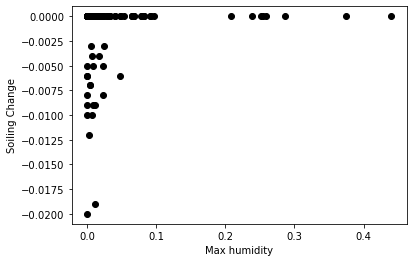

In [62]:
plt.scatter(df_delta["Mean precip"], df_delta["Soiling Change"], color = "black")
plt.xlabel("Max humidity")
plt.ylabel("Soiling Change")